# Python Programming: Naive Bayes and kNN Classifiers

## 1. Defining the Question

### a) Specifying the Data Analytic Question
conduct experiments on the two datasets by Building a K-nearest neighbor (kNN) model classifier and a Naive Bayes model classifier then calculate the resulting metrics.

### b) Defining the Metric for Success
* 1. KNN Multinomial Model with accuracy score between 80-90%
* 2. Naive Bayes classifier model with accuracy 80-90%

### c) Understanding the context 

### Dataset 1

The dataset1 has the following features: The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including:

* survived
* Age
* passenger-class
* sex
* fare
* Embarked

### Dataset 2

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The dataset is collection of spam e-mails came from our postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails

Data Features
The dataset2 has the following features:

* Data Set Characteristics: Multivariate
* Number of Instances:4601
* Industry source: Computing
* Attribute Characteristics:Integer, Real
* Number of Attributes:57
* Missing Values?:Yes
* Number of Web Hits:510321

### d) Recording the Experimental Design

Steps to implement:
* Data Pre-processing step
* EDA 
* Fitting the model(KNN/Naive Bayes) to the Training set
* Predicting the test result
* Test accuracy of the result(Creation of Confusion matrix)
* Visualizing the test set result.

### e) Data Relevance

Provided data is relevant to the tasks to be performed

# SOLUTION 2

## 2. Reading the Data

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
train=pd.read_csv('train (5).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [93]:
test=pd.read_csv('test (1).csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 3. Checking the Data

In [94]:
# Determining the no. of records in our dataset

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [97]:
#
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
# Previewing the bottom of our dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [100]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [101]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [102]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [103]:
#checking the shape for the datasets
train.shape,test.shape

((891, 12), (418, 11))

# 4. External Data Source Validation
### a.Validation

#### 1.Dataset 1.https://www.openml.org/data/get_csv/16826755/phpMYEkMl

#### 2.Dataset 2.https://www.wolframcloud.com/objects/9cb5e76b-d099-4960-a797-81f4c5742c30

In [104]:
## 5. Tidying the Dataset


In [105]:
# Checking for Outliers
#


In [106]:
# Checking for Anomalies
#
#checking for duplicates
train.duplicated().sum()

0

In [107]:
#checking for unique values in the different columns
for columns in train.columns:
    print('/n')
    print(train[columns].unique())

/n
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246

In [108]:
#checking for unique values in the different columns
for columns in test.columns:
    print('/n')
    print(test[columns].unique())

/n
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 10

In [109]:
#checking for duplicates
test.duplicated().sum()

0

In [110]:
# Identifying the Missing Data
#


In [111]:
# Dealing with the Missing Data
#checking for missing values
train.isna().sum()
#
# More data cleaning procedures
#

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
#checking for missing values
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [113]:
#checking for missing data
train.isna().any().sum()

3

In [114]:
#checking for missing data
test.isna().any().sum()

3

In [115]:
#MODE IMPUTATION
cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train[cols]=train[cols].fillna(train.mode().iloc[0])

In [116]:
#MODE IMPUTATION
cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

test[cols]=test[cols].fillna(test.mode().iloc[0])

In [117]:
train.isna().any().sum()

0

In [118]:
#checking for missing data
test.isna().any().sum()

0

In [119]:
# print the shapes of X and y
# X is our features matrix with 150 x 4 dimension
#print(x.shape)
# y is our response vector with 150 x 1 dimension
#print(y.shape)

In [120]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = train.columns[categorical_feature_mask].tolist()
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [121]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(5):
    new = le.fit_transform(train[categorical_features[i]])
    train[categorical_features[i]] = new
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,47,2


In [122]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = test.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = test.columns[categorical_feature_mask].tolist()
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [123]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(5):
    new = le.fit_transform(test[categorical_features[i]])
    test[categorical_features[i]] = new
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,15,1
1,893,3,403,0,47.0,1,0,221,7.0000,15,2
2,894,2,269,1,62.0,0,0,73,9.6875,15,1
3,895,3,408,1,27.0,0,0,147,8.6625,15,2
4,896,3,178,0,22.0,1,1,138,12.2875,15,2


# 6. Exploratory Analysis
### Ploting the bivariate summaries and recording our observations


In [124]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [125]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

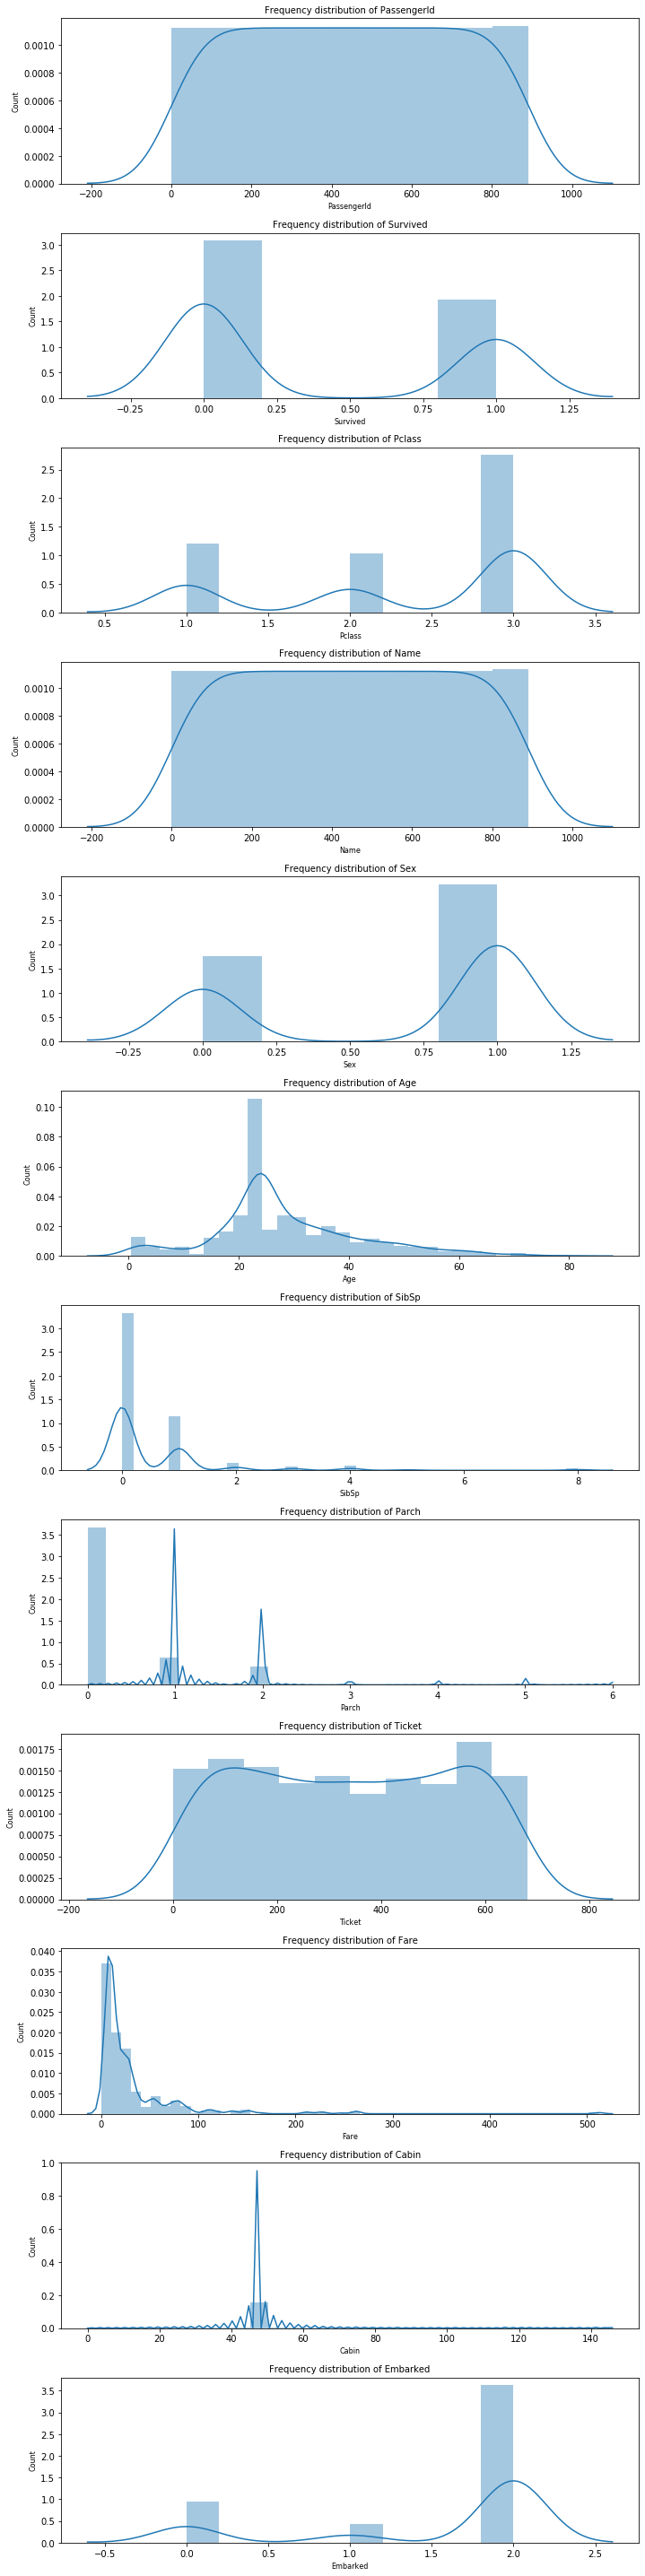

In [126]:
# Plotting distribution of numerical variables
col_names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

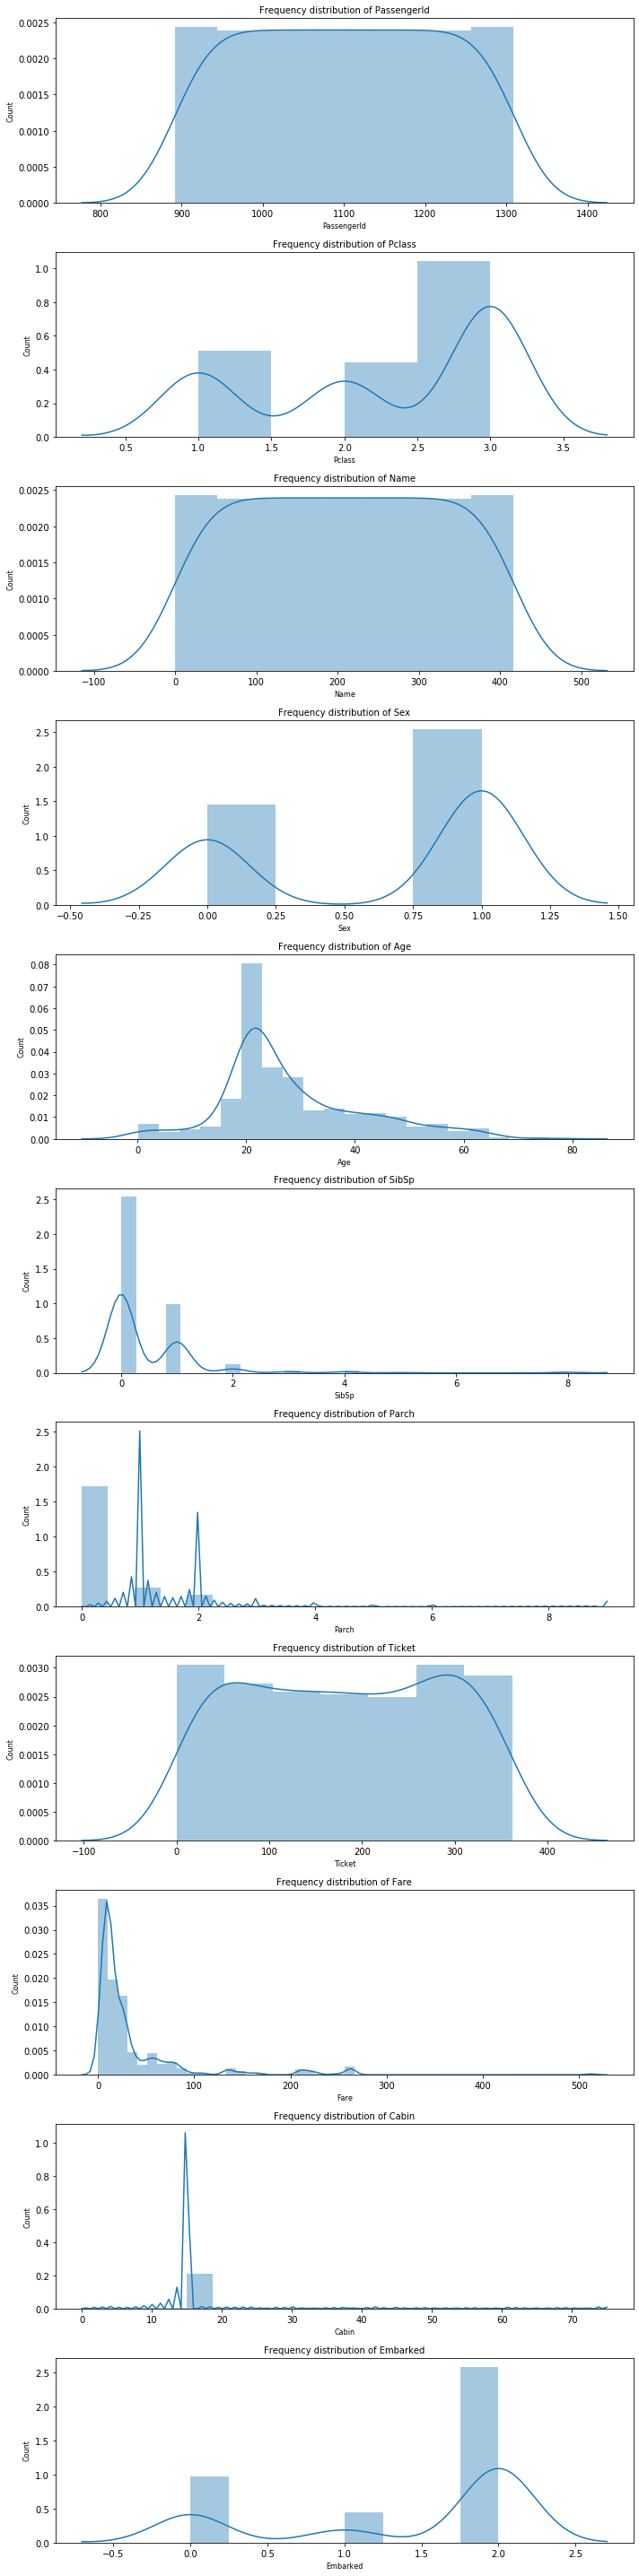

In [127]:
# Plotting distribution of numerical variables
col_names = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(test[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

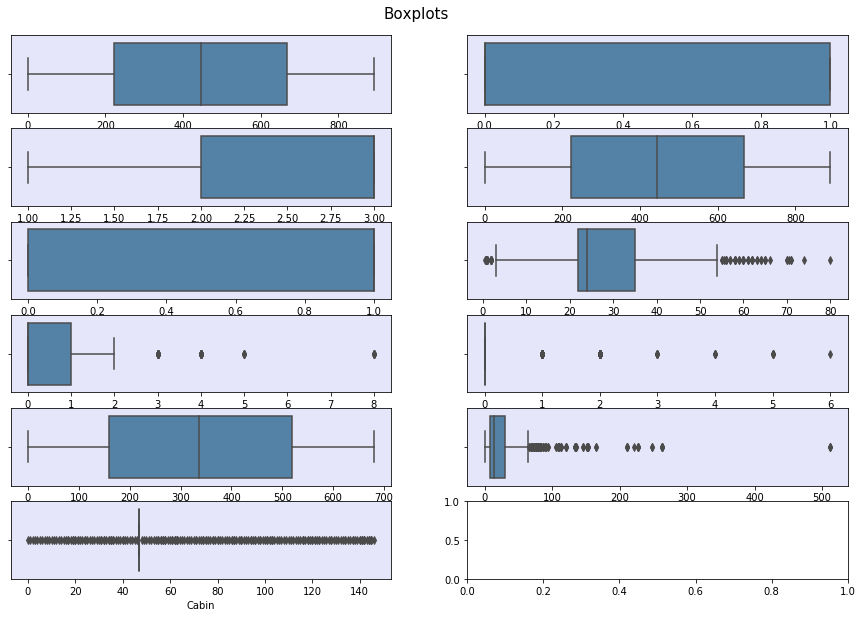

In [128]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['PassengerId','Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), train, col_list, colors):
  sns.boxplot(train[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

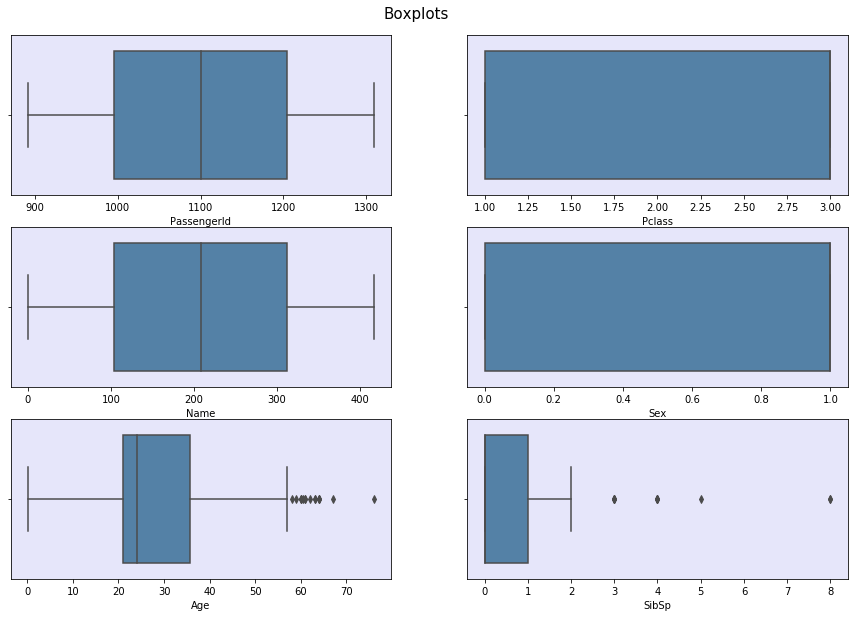

In [129]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), test, col_list, colors):
  sns.boxplot(test[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

Test size equals 30,Train size =70

## 7. Implementing the Solution
#### Implementing the Solution
# 

In [130]:
# create X (features) and y (response)
x = train.drop(['Survived','Name'],axis=1)
y = train['Survived']

In [131]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.40, random_state=0)  

In [132]:
# print the shapes of the new X objects
print(x_train.shape)
print(x_test.shape)

(534, 10)
(357, 10)


In [133]:
# print the shapes of the new X objects
print(x_train.shape)
print(x_test.shape)

(534, 10)
(357, 10)


In [134]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(534,)
(357,)


In [135]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
#x_train= st_x.fit_transform(x_train)    
#x_test= st_x.transform(x_test)  

In [136]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [137]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.7710437710437711


In [138]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [139]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[168,  53],
       [ 72,  64]], dtype=int64)

In [140]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In [141]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(712,)
(179,)


In [142]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [143]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [144]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.7710437710437711


In [145]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [146]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[96, 14],
       [17, 52]], dtype=int64)

In [147]:
print(metrics.accuracy_score(y_test, y_pred))

0.8268156424581006


In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 14]
 [17 52]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



Text(0, 0.5, 'Error Rate')

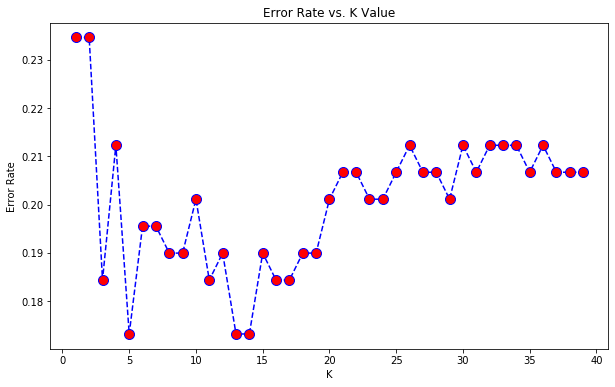

In [149]:
#Choosing a K Value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [150]:
#getting scores
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 60)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7653631284916201, 0.7653631284916201, 0.8156424581005587, 0.7877094972067039, 0.8268156424581006, 0.8044692737430168, 0.8044692737430168, 0.8100558659217877, 0.8100558659217877, 0.7988826815642458, 0.8156424581005587, 0.8100558659217877, 0.8268156424581006, 0.8268156424581006, 0.8100558659217877, 0.8156424581005587, 0.8156424581005587, 0.8100558659217877, 0.8100558659217877, 0.7988826815642458, 0.7932960893854749, 0.7932960893854749, 0.7988826815642458, 0.7988826815642458, 0.7932960893854749, 0.7877094972067039, 0.7932960893854749, 0.7932960893854749, 0.7988826815642458, 0.7877094972067039, 0.7932960893854749, 0.7877094972067039, 0.7877094972067039, 0.7877094972067039, 0.7932960893854749, 0.7877094972067039, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7988826815642458, 0.7932960893854749, 0.7988826815642458, 0.7988826815642458, 0.7932960893854749, 0.7877094972067039, 0.7821229050279329, 0.7932960893854749, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329,

Text(0.5, 1.0, 'plot of Test Accuracy Score Vs Values of kNN Neighbors')

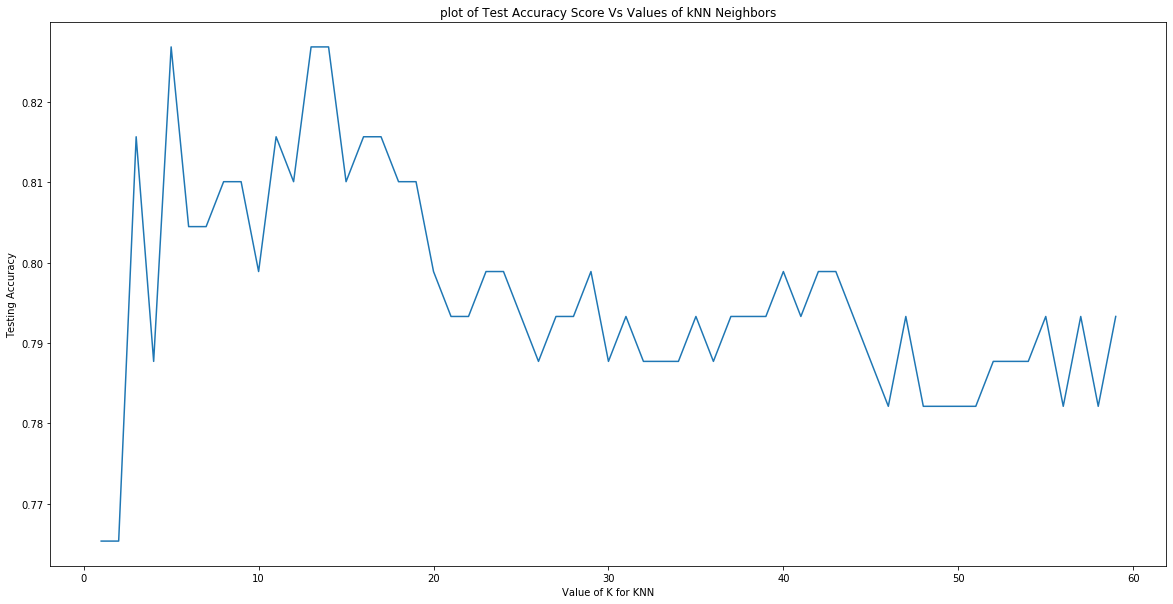

In [151]:
# plot of scores
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.figure(figsize=(20,10))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('plot of Test Accuracy Score Vs Values of kNN Neighbors')

# REPEATING WITH DIMENSIONALITY REDUCTION USING PCA,LDA AND NCA TECHNIQUES 

In [152]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(__doc__)

n_neighbors = 5
random_state = 0

Automatically created module for IPython interactive environment


In [153]:
dim = 2
n_classes = len(np.unique(y))

In [154]:
# Reduce dimension to 3 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=1, random_state=random_state))

In [155]:
# Reduce dimension to 3 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=1))

In [156]:

# Reduce dimension to 1 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=1,
                                                   random_state=random_state))

In [157]:
# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [158]:
# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

<Figure size 1440x720 with 0 Axes>

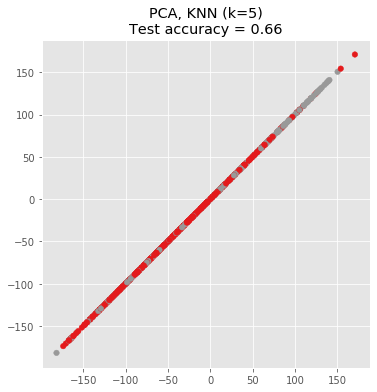

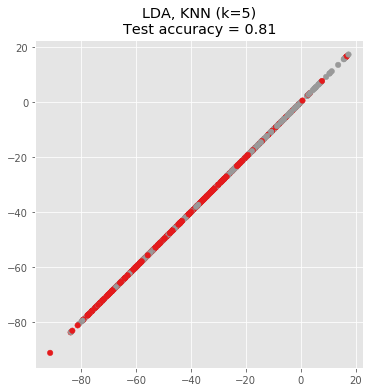

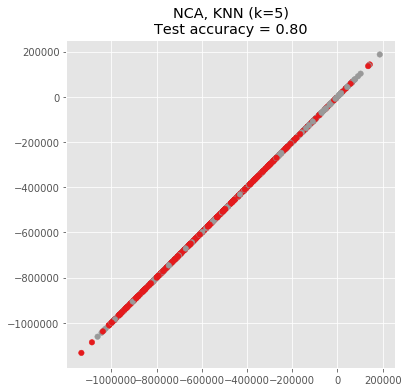

In [159]:
# Set the style to `ggplot`
plt.style.use("ggplot")
plt.figure(figsize=(20,10))
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 3, i + 1, aspect=1)
    #Fit the method's model
    model.fit(x_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(x_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(x_test), y_test)
    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(x)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 0], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,n_neighbors,acc_knn))
plt.show()

* NeighborhoodComponentsAnalysis produces accuracy of 82%,PCA =71%,LDA=77%  with 0.4 Sample split

* NeighborhoodComponentsAnalysis produces accuracy of 78%,PCA =66%,LDA=78%  with 0.3 Sample split

* NeighborhoodComponentsAnalysis produces accuracy of 80%,PCA =66%,LDA=81%  with 0.2 Sample split

## 8. Challenging the solution
#### Reviewing the Solution 
###  Imbalanced class causes low accuracy apply Class imbalance correction techniques such as SMOTE

## 9. Follow up questions
#### a). Did we have the right data?
## NO. Data is imbalanced
#### b). Do we need other data to answer our question?
## Yes. 
#### c). Did we have the right question?
## Yes

# SOLUTION 2

In [160]:
#importing the neccessary libraries
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Reading the Data

In [161]:
#
#loading the data and previewing the top
data =pd.read_csv('spambase_csv.csv')
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0



# 3. Checking the Data


In [162]:
#loading the data and previewing the top
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [163]:
# previewing the Bottom
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [164]:
# Determining the no. of records in our dataset
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [165]:
#determining the tatol records per column
data.count()

word_freq_make                4601
word_freq_address             4601
word_freq_all                 4601
word_freq_3d                  4601
word_freq_our                 4601
word_freq_over                4601
word_freq_remove              4601
word_freq_internet            4601
word_freq_order               4601
word_freq_mail                4601
word_freq_receive             4601
word_freq_will                4601
word_freq_people              4601
word_freq_report              4601
word_freq_addresses           4601
word_freq_free                4601
word_freq_business            4601
word_freq_email               4601
word_freq_you                 4601
word_freq_credit              4601
word_freq_your                4601
word_freq_font                4601
word_freq_000                 4601
word_freq_money               4601
word_freq_hp                  4601
word_freq_hpl                 4601
word_freq_george              4601
word_freq_650                 4601
word_freq_lab       

In [166]:
#checking the shape of the data base
data.shape

(4601, 58)

In [167]:
# Checking whether each column has an appropriate datatype
#
#checking the data types of columns
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [168]:
#checking columns
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [169]:
# 4. External Data Source Validation
### a.Validation


# 5. Tidying the Dataset

In [170]:
# Checking for Anomalies
#
#finding and summing the toatal duplicates in rows
sum(data.duplicated())

391

In [171]:
data=data.drop_duplicates()

In [172]:
#confirming the total duplicates in rows
sum(data.duplicated())

0

# 6. Exploratory Analysis

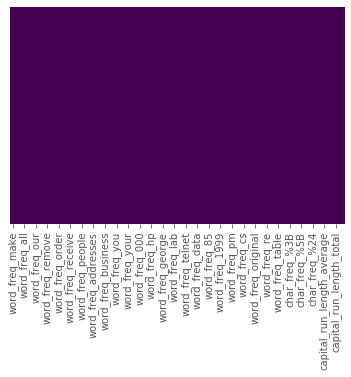

In [173]:
# Dealing with the Missing Data
#visualizing missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

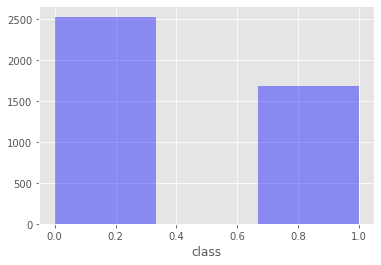

In [174]:
#checking the class distribution
sns.distplot(data['class'].dropna(), kde=False, bins=3, color='Blue');

<function matplotlib.pyplot.show(*args, **kw)>

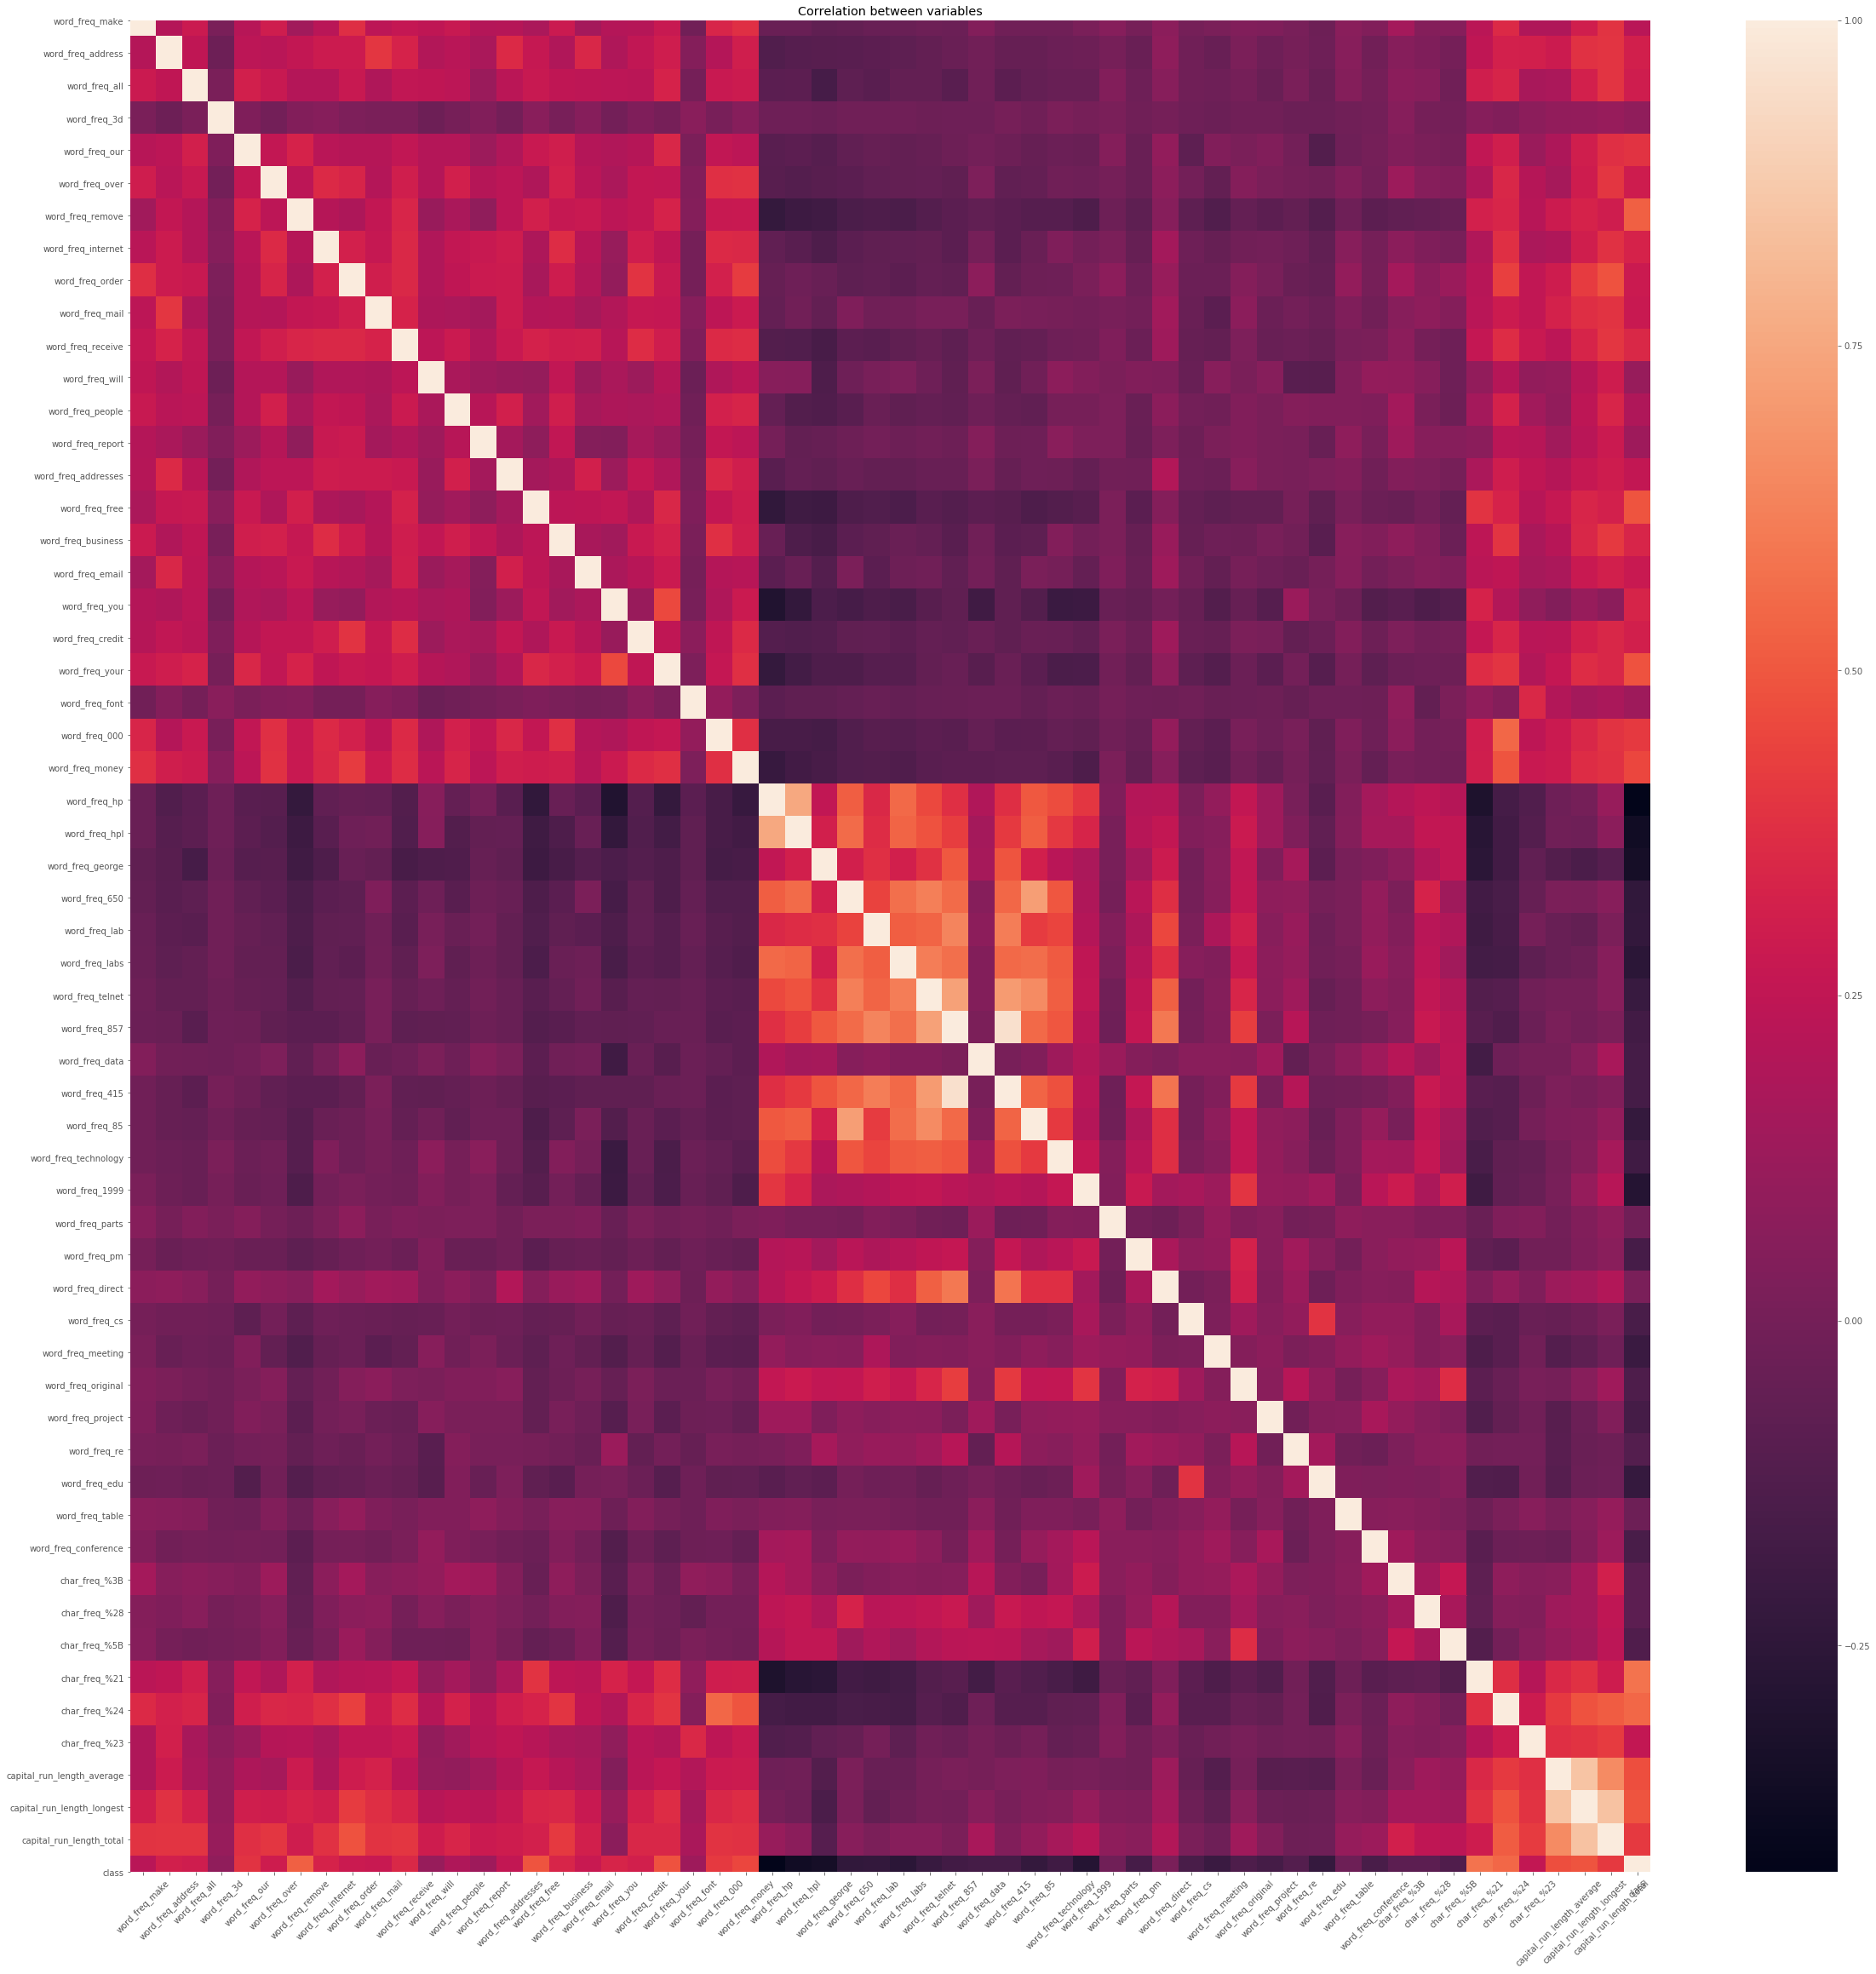

In [175]:
#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(40,40))
correlation_matrix=data.corr(method = 'spearman')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = False)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

#  7. Implementing the Solution

In [176]:
#selecting target and features
X = data.drop('class',axis=1)
y = data['class']

In [177]:
#Split data
#import lDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis()

In [178]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [179]:
#check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2947, 57), (1263, 57), (2947,), (1263,))

In [180]:
# Fitting our model  
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [181]:
# Evaluating the Model
# 
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### MODEL EVALUATION/PERFORMANCE

In [182]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.78701504354711

In [185]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[663,  95],
       [174, 331]], dtype=int64)

## Effects of sample splits on the model performance
####  accuracy of 0.7874109263657957 and roc_auc_score of 0.9477212671832783  with 0.2 sample split
#### accuracy of 0.78701504354711 and roc_auc_score of 0.9466966221688132  with 0.3 sample split 
#### accuracy of 0.78701504354711 and roc_auc_score of 0.9466966221688132  with 0.4 sample split

# 8. Challenging the solution


#### Reviewing the Solution 

### A class imbalance:

#  0  :  758
#  1  :  505

#### This leads to poor accuracy, apply class treatment  techniques such as SMOTE


# There is a majority class of 0 , hence the classes are skewed and imbalanced

In [186]:
!pip install imbalanced-learn

# SMOTE:Synthetic Minority Over-sampling Technique 
SMOTE should be done AFTER cross validation splits

In [188]:
#Checking How badly is the data imbalanced? Intergalactic:
print('inter-galactic')
for theClass in data.loc[:,'class'].unique():
    print('class ' + str(theClass) + ':')
    trueFilter=data['class']==theClass
    print(trueFilter.sum())

inter-galactic
class 1:
1679
class 0:
2531


In [187]:
#Synthetic Minority Over-sampling Technique 
#using under-sampling class methods
#Under-sampling refers to the process of reducing the number of samples in the majority classes. The implemented methods can be categorized into 2 groups: (i) fixed under-sampling and (ii) cleaning under-sampling.
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 2531, 1: 1679})
Resampled dataset shape Counter({1: 2531, 0: 2531})


In [197]:
#Split data
#import lDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_res, y_res)

LinearDiscriminantAnalysis()

In [198]:
from sklearn.model_selection import train_test_split
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=6) 

In [199]:
# Fitting our model  
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [200]:
# Evaluating the Model
# 
y_pred = model.predict(X_test)
y_pred
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7860434496379197

In [201]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[625, 111],
       [214, 569]], dtype=int64)

# Oversampling

In [189]:
# example of random oversampling to balance the class distribution
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 2531, 1: 1679})
Counter({1: 2531, 0: 2531})


In [202]:
#Split data
#import lDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_over, y_over)

LinearDiscriminantAnalysis()

In [203]:
# Splitting our data into a training set and a test set
from sklearn.model_selection import train_test_split
# 
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=6) 

In [204]:
# Fitting our model  
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [205]:
# Evaluating the Model
# 
y_pred = model.predict(X_test)
y_pred
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7658730158730159

In [206]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[412,  78],
       [158, 360]], dtype=int64)

## Undersampling

In [207]:
# example of random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({0: 2531, 1: 1679})
Counter({0: 1679, 1: 1679})


In [210]:
#Split data
#import lDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_under, y_under)

LinearDiscriminantAnalysis()

In [211]:
from sklearn.model_selection import train_test_split
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=6)

In [213]:
# Fitting our model  
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [214]:
# Evaluating the Model
# 
y_pred = model.predict(X_test)
y_pred
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7708333333333334

In [215]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[418,  72],
       [159, 359]], dtype=int64)

# Conclusion

#### Applying SMOTE, Undersampling and Oversampling techniques didn't Class imbalance 


# 9. Follow up questions




# a). Did we have the right data?

 ###  No data had a class imbalance that affects model performance


#  b). Do we need other data to answer our question?

### Yes 

#  c). Did we have the right question?

### Yes

